In [1]:
import os
import pandas as pd
import numpy as np
import torch
from imutils import paths
import imageio
import glob
import matplotlib.pyplot as plt
from torch.utils.data.dataset import Dataset  # For custom data-sets
from torchvision import transforms
import PIL
from PIL import Image


Label: [7, 2, 0]


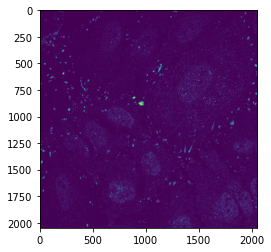

In [4]:
def format_labels(df_labels):
    for index in range(len(df_labels)): #iterate over the data frame 
        lbl  = df_labels["Label"].iloc[index]
        lst  = lbl.split("|")
        map_obj = map(int, lst)
        lst_int = list(map_obj)
        df_labels.at[index, 'Label'] = lst_int
        labels = df_labels.loc[:,"Label"]
    return (labels)



image_dir = '../data/train_toy_data/'
label_path = "../data/toy_labels.csv"

df_labels = pd.read_csv(label_path).drop(['Unnamed: 0'],axis=1)
labels = format_labels(df_labels)


class HPA(Dataset):

    def __init__(self, image_dir, labels, transform=None):
        self.image_dir = image_dir
        self.image_files = os.listdir(image_dir)
        self.labels = labels
        self.transform = transforms.ToTensor()


    def __len__(self):
        return len(self.labels)

    def __getitem__(self, index):
        image_name = os.path.join(self.image_dir, self.image_files[index])  
        image = PIL.Image.open(image_name)
        label = self.labels[index]
        
        if self.transform:
            image = self.transform(image)
        return (image, label)

dset = HPA(image_dir, labels, transform= True)   
train_dataset, test_dataset = torch.utils.data.random_split(dset, [70, 30])


def show_image(image, label, dataset):
    print(f"Label: {label}") 
    plt.imshow(image.permute(1,2,0))#
    plt.show()

show_image(*train_dataset[1], train_dataset)

In [ ]:
for index in range(len(labels)): #iterate over the data frame and get IDs
    ids = labels["ID"].iloc[index]
    
    data =[]
    pattern = f'../data/train_toy_data/*{str(ids)}_*.png'
    files = glob.glob(pattern)# match the ID with filename
    
    for file in files:
        data.append(file)
        
    
print(data)
    

In [ ]:
import glob

for index in range(len(labels)): #iterate over the data frame and get IDs
    ids = labels["ID"].iloc[index]
    x =[]
    pattern = f'../data/train_toy_data/*{str(ids)}_*.png'
    files = glob.glob(pattern)# match the ID with filename
    
    for file in files:
        img = imageio.imread(file)# read img to numpy
        x.append(torch.from_numpy(img))#transform to tensor
        xt = torch.stack(x)# stack the 4 channels
    #print(xt.shape)
        #i = i+1
        
  



In [ ]:
from torch.utils.data import Dataset
import pandas as pd
import os
from PIL import Image
import torch

class HPA(Dataset):
    def __init__(self, root_dir, annotation_file, transform=None):
        self.root_dir = '../data/train_toy_data/'
        annotations = pd.read_csv("../data/toy_labels.csv").drop(['Unnamed: 0'],axis=1)
    
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        img_id = annotations.iloc[index, 0]
        pattern = f'*{str(img_id)}_*.png'
        img = glob.glob(pattern)# match the ID with filename

        y_label = torch.tensor((annotations.iloc[index, 1]))



In [ ]:
links
https://medium.com/analytics-vidhya/creating-a-custom-dataset-and-dataloader-in-pytorch-76f210a1df5d
https://medium.com/bivek-adhikari/creating-custom-datasets-and-dataloaders-with-pytorch-7e9d2f06b660
